In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

In [3]:
algo1_3v = pd.read_csv('results/3valgo1.csv')
algo1_4v = pd.read_csv('results/4valgo1.csv')

algo2_3v = pd.read_csv('results/3valgo2.csv')
algo2_4v = pd.read_csv('results/4valgo2.csv')

algo2i_3v = pd.read_csv('results/3valgo2i.csv')
algo2i_4v = pd.read_csv('results/4valgo2i.csv')

optsol_3v = pd.read_csv('results/3voptsol.csv')
optsol_4v = pd.read_csv('results/4voptsol.csv')

In [47]:
algo1_4v[algo1_4v['input_size'] == 24].describe()

,cost_algo1,runtime_algo1,input_size
count,1.0,1.000000,1.0
mean,4.0,0.008766,24.0
std,NaN,NaN,NaN
min,4.0,0.008766,24.0
25%,4.0,0.008766,24.0
50%,4.0,0.008766,24.0
75%,4.0,0.008766,24.0
max,4.0,0.008766,24.0


In [46]:
optsol_4v[optsol_4v['input_size'] == 24].describe()

,cost_optsol,runtime_optsol,input_size
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [4]:
algo1_3v_trees = pd.read_csv('results/3valgo1trees.csv')
algo1_4v_trees = pd.read_csv('results/4valgo1trees.csv')
algo1_5v_trees = pd.read_csv('results/5valgo1trees.csv')
algo1_6v_trees = pd.read_csv('results/6valgo1trees.csv')

algo2_3v_trees = pd.read_csv('results/3valgo2trees.csv')
algo2_4v_trees = pd.read_csv('results/4valgo2trees.csv')
algo2_5v_trees = pd.read_csv('results/5valgo2trees.csv')
algo2_6v_trees = pd.read_csv('results/6valgo2trees.csv')

algo2i_3v_trees = pd.read_csv('results/3valgo2itrees.csv')
algo2i_4v_trees = pd.read_csv('results/4valgo2itrees.csv')
algo2i_5v_trees = pd.read_csv('results/5valgo2itrees.csv')
algo2i_6v_trees = pd.read_csv('results/6valgo2itrees.csv')

In [5]:
dimensions_algo1 = [algo1_3v.shape, algo1_4v.shape,
                    algo1_3v_trees.shape, algo1_4v_trees.shape,
                    algo1_5v_trees.shape, algo1_6v_trees.shape]
dimensions_algo2 = [algo2_3v.shape, algo2_4v.shape,
                    algo2_3v_trees.shape, algo2_4v_trees.shape,
                    algo2_5v_trees.shape, algo2_6v_trees.shape]
dimensions_algo2i = [algo2i_3v.shape, algo2i_4v.shape,
                     algo2i_3v_trees.shape, algo2i_4v_trees.shape,
                     algo2i_5v_trees.shape, algo2i_6v_trees.shape]
dimensions_optsol = [optsol_3v.shape, optsol_4v.shape]

print(dimensions_algo1)
print(dimensions_algo2)
print(dimensions_algo2i)
print(dimensions_optsol)

[(63, 4), (2149, 4), (12, 4), (128, 4), (2000, 4), (41472, 4)]
[(63, 4), (2149, 4), (12, 4), (128, 4), (2000, 4), (41472, 4)]
[(63, 4), (2149, 4), (12, 4), (128, 4), (2000, 4), (41472, 4)]
[(63, 4), (2148, 4)]


In [6]:
def merge(dataframe1, dataframe2, dataframes):
    main = pd.merge(dataframe1, dataframe2, how='outer')
    for dataframe in dataframes:
        main = pd.merge(main, dataframe, how='outer')
    
    return main

def extend(dataframe, keywords, flag):
    dataframe['input_size'] = dataframe['input'].map(lambda x: x.count('-') + 1)
    dataframe['vertex_count'] = dataframe['input'].map(lambda x: x.split('-')[0].count(',') + 1)

    for keyword in keywords:
        dataframe[f'num_rel_{keyword}'] = dataframe[f'output_{keyword}'].map(lambda x: str(x).count('('))
        # dataframe[f'num_trans_{keyword}']
        if keyword != 'optsol' and flag == 'all':
            dataframe[f'approx_{keyword}'] = dataframe.apply(lambda x: 
                                                             x[f'cost_{keyword}']/x[f'cost_optsol'], axis=1)
            dataframe[f'cost_diff_{keyword}'] = dataframe.apply(lambda x: 
                                                                abs(x[f'cost_{keyword}'] - x[f'cost_optsol']), axis=1)

In [7]:
def plotScatter(dataframe, columns):
    analysis = dataframe[columns]
    ax = sns.regplot(x=columns[0], y=columns[1], data=analysis)
    slope, intercept, r_value, p_value, std_err = sc.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                                      y=ax.get_lines()[0].get_ydata())
    
    print(f"y = {slope:.5f}x + {intercept:.5f}")
    plt.show()
    
def getOptApprox(dataframe, algorithm, columns, flag='all'):
    if flag == 'all':
        column = f'cost_diff_{algorithm}'
        optval = 0
    else:
        column = f'cost_{algorithm}'
        optval = 1
    optapprox = dataframe[dataframe[column] == optval]
    optapprox = optapprox[columns]
    
    return optapprox

def getNonoptApprox(dataframe, algorithm, columns, flag='all'):
    if flag == 'all':
        column = f'cost_diff_{algorithm}'
        optval = 0
    else:
        column = f'cost_{algorithm}'
        optval = 1
    nonoptapprox = dataframe[dataframe[column] != optval]
    nonoptapprox = nonoptapprox[columns]
    
    return nonoptapprox

def getSameApprox(dataframe, algorithm1, algorithm2, columns):
    sameapprox = dataframe[dataframe[f'cost_{algorithm1}'] == dataframe[f'cost_{algorithm2}']]
    sameapprox = sameapprox[columns]
    
    return sameapprox

def getDiffApprox(dataframe, algorithm1, algorithm2):
    diffapprox = dataframe[dataframe[f'cost_{algorithm1}'] != dataframe[f'cost_{algorithm2}']]
    diffapprox = diffapprox[columns]
    
    return diffapprox

# Vertex Count

In [8]:
all3 = merge(algo1_3v, algo2_3v, [algo2i_3v, optsol_3v])
all4 = merge(algo1_4v, algo2_4v, [algo2i_4v, optsol_4v])

algo1 = merge(algo1_3v, algo1_4v, [optsol_3v, optsol_4v])
algo2 = merge(algo2_3v, algo2_4v, [optsol_3v, optsol_4v])
algo2i = merge(algo2i_3v, algo2i_4v, [optsol_3v, optsol_4v])
optsol = pd.merge(optsol_3v, optsol_4v, how='outer')

In [11]:
extend(all3, ['algo1', 'algo2', 'algo2i', 'optsol'], 'all')
extend(all4, ['algo1', 'algo2', 'algo2i', 'optsol'], 'all')

extend(algo1, ['algo1', 'optsol'], 'all')
extend(algo2, ['algo2', 'optsol'], 'all')
extend(algo2i, ['algo2i', 'optsol'], 'all')
extend(optsol, ['optsol'], 'all')

print(all3.shape)
print(all4.shape)
print(algo1.shape)
print(algo2.shape)
print(algo2i.shape)

(63, 25)
(2149, 25)
(4360, 13)
(4360, 13)
(4360, 13)


,input,cost_algo1,output_algo1,runtime_algo1,cost_algo2,output_algo2,runtime_algo2,cost_algo2i,output_algo2i,runtime_algo2i,cost_optsol,output_optsol,runtime_optsol,input_size,vertex_count,num_rel_algo1,approx_algo1,cost_diff_algo1,num_rel_algo2,approx_algo2,cost_diff_algo2,num_rel_algo2i,approx_algo2i,cost_diff_algo2i,num_rel_optsol
2148,"[1, 2, 3, 4]-[1, 2, 4, 3]-[1, 3, 2, 4]-[1, 3, 4, 2]-[1, 4, 2, 3]-[1, 4, 3, 2]-[2, 1, 3, 4]-[2, 1, 4, 3]-[2, 3, 1, 4]-[2, 3, 4, 1]-[2, 4, 1, 3]-[2, 4, 3, 1]-[3, 1, 2, 4]-[3, 1, 4, 2]-[3, 2, 1, 4]-[3, 2, 4, 1]-[3, 4, 1, 2]-[3, 4, 2, 1]-[4, 1, 2, 3]-[4, 1, 3, 2]-[4, 2, 1, 3]-[4, 2, 3, 1]-[4, 3, 1, 2]-[4, 3, 2, 1]",4,"['[(1, 4), (2, 4), (3, 4)]', '[(1, 3), (2, 3), (4, 3)]', '[(1, 2), (3, 2), (4, 2)]', '[(2, 1), (3, 1), (4, 1)]']",0.008766,37,"['[(1, 3), (1, 4), (2, 3), (2, 4)]', '[(1, 2), (1, 3), (1, 4), (2, 4), (3, 4)]', '[(1, 3), (1, 4), (2, 3), (2, 4)]', '[(1, 2), (1, 3), (1, 4), (2, 3), (4, 3)]', '[(1, 3), (1, 4), (2, 3), (2, 4), (4, 3)]', '[(1, 2), (1, 4), (3, 2), (3, 4)]', '[(1, 2), (1, 4), (3, 2), (3, 4)]', '[(1, 2), (1, 3), (1, 4), (3, 2), (4, 2)]', '[(1, 2), (1, 4), (3, 2), (3, 4), (4, 2)]', '[(1, 2), (1, 3), (4, 2), (4, 3)]', '[(1, 2), (1, 3), (4, 2), (4, 3)]', '[(1, 2), (1, 3), (3, 2), (4, 2), (4, 3)]', '[(1, 3), (1, 4), (2, 1), (2, 3), (2, 4)]', '[(1, 4), (2, 1), (2, 3), (2, 4), (3, 4)]', '[(1, 3), (2, 1), (2, 3), (2, 4), (4, 3)]', '[(2, 1), (2, 4), (3, 1), (3, 4)]', '[(2, 1), (2, 4), (3, 1), (3, 4)]', '[(2, 1), (2, 3), (2, 4), (3, 1), (4, 1)]', '[(2, 1), (2, 4), (3, 1), (3, 4), (4, 1)]', '[(2, 1), (2, 3), (4, 1), (4, 3)]', '[(2, 1), (2, 3), (4, 1), (4, 3)]', '[(2, 1), (2, 3), (3, 1), (4, 1), (4, 3)]', '[(1, 2), (1, 4), (3, 1), (3, 2), (3, 4)]', '[(1, 4), (2, 4), (3, 1), (3, 2), (3, 4)]', '[(1, 2), (3, 1), (3, 2), (3, 4), (4, 2)]', '[(2, 1), (2, 4), (3, 1), (3, 2), (3, 4)]', '[(2, 1), (3, 1), (3, 2), (3, 4), (4, 1)]', '[(3, 1), (3, 2), (4, 1), (4, 2)]', '[(3, 1), (3, 2), (4, 1), (4, 2)]', '[(2, 1), (3, 1), (3, 2), (4, 1), (4, 2)]', '[(1, 2), (1, 3), (4, 1), (4, 2), (4, 3)]', '[(1, 3), (2, 3), (4, 1), (4, 2), (4, 3)]', '[(1, 2), (3, 2), (4, 1), (4, 2), (4, 3)]', '[(2, 1), (2, 3), (4, 1), (4, 2), (4, 3)]', '[(2, 1), (3, 1), (4, 1), (4, 2), (4, 3)]', '[(3, 1), (3, 2), (4, 1), (4, 2), (4, 3)]', '[(2, 1), (3, 1), (3, 2), (4, 1), (4, 2), (4, 3)]']",0.006765,6,"['[(1, 3), (1, 4), (2, 3), (2, 4)]', '[(1, 2), (1, 4), (3, 2), (3, 4)]', '[(1, 2), (1, 3), (4, 2), (4, 3)]', '[(2, 1), (2, 4), (3, 1), (3, 4)]', '[(2, 1), (2, 3), (4, 1), (4, 3)]', '[(3, 1), (3, 2), (4, 1), (4, 2)]']",0.000226,NaN,NaN,NaN,24,4,12,NaN,NaN,174,NaN,NaN,24,NaN,NaN,0


y = 0.00043x + -0.00149


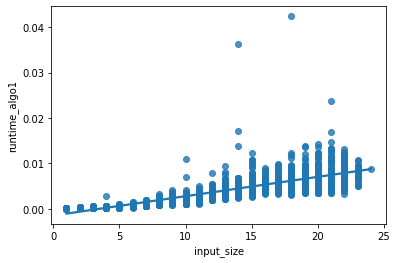

y = 0.00028x + -0.00120


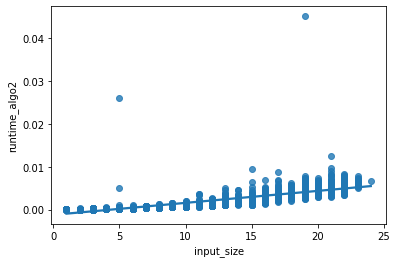

y = 0.00001x + 0.00004


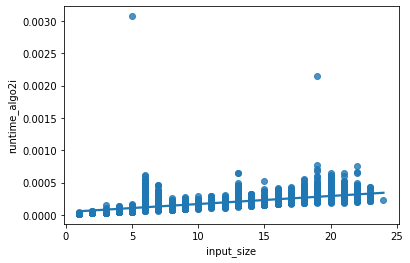

y = 81.54392x + -547.07012


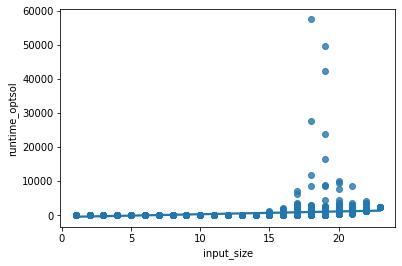

In [41]:
plotScatter(algo1, ['input_size', 'runtime_algo1'])
plotScatter(algo2, ['input_size', 'runtime_algo2'])
plotScatter(algo2i, ['input_size', 'runtime_algo2i'])
plotScatter(optsol, ['input_size', 'runtime_optsol'])

y = 0.23389x + 3.11878


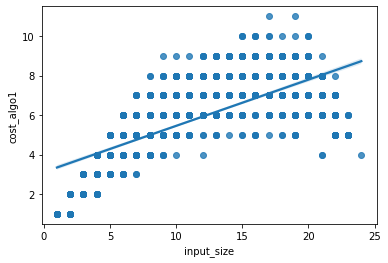

y = 1.45978x + -2.63095


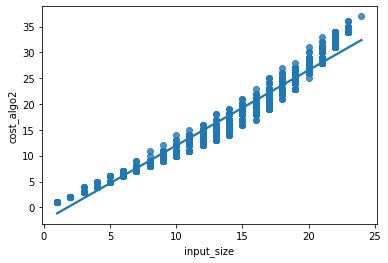

y = 0.36696x + 2.24680


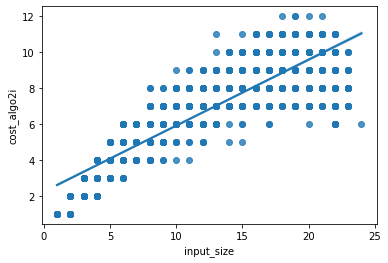

y = 0.10173x + 3.40265


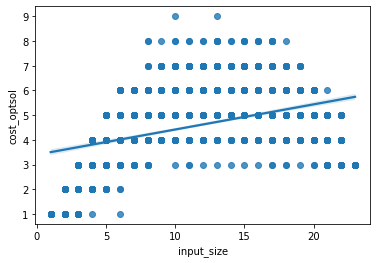

In [42]:
plotScatter(algo1, ['input_size', 'cost_algo1'])
plotScatter(algo2, ['input_size', 'cost_algo2'])
plotScatter(algo2i, ['input_size', 'cost_algo2i'])
plotScatter(optsol, ['input_size', 'cost_optsol'])

y = 0.36669x + 4.92712


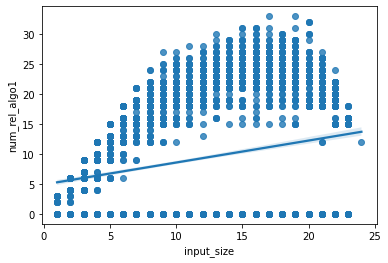

y = 3.47993x + -3.71955


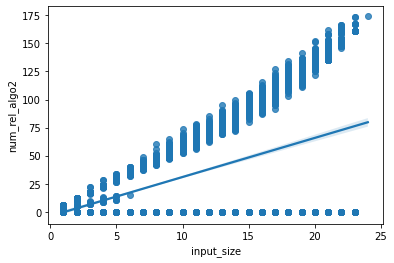

y = 0.82914x + 7.69012


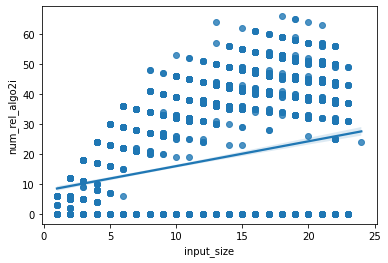

y = 0.06994x + 21.12739


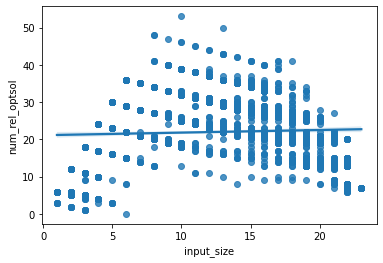

In [43]:
plotScatter(algo1, ['input_size', 'num_rel_algo1'])
plotScatter(algo2, ['input_size', 'num_rel_algo2'])
plotScatter(algo2i, ['input_size', 'num_rel_algo2i'])
plotScatter(optsol, ['input_size', 'num_rel_optsol'])

In [57]:
columns_fixed = ['input', 'output_optsol', 'cost_optsol']
columns_algo1 = columns_fixed + ['output_algo1']
columns_algo2 = columns_fixed + ['output_algo2']
columns_algo2i = columns_fixed + ['output_algo2i']

optapprox_algo1 = getOptApprox(algo1, 'algo1', columns_algo1)
optapprox_algo2 = getOptApprox(algo2, 'algo2', columns_algo2)
optapprox_algo2i = getOptApprox(algo2i, 'algo2i', columns_algo2i)

optapprox_algo1_v3 = getOptApprox(all3, 'algo1', columns_algo1)
optapprox_algo2_v3 = getOptApprox(all3, 'algo2', columns_algo2)
optapprox_algo2i_v3 = getOptApprox(all3, 'algo2i', columns_algo2i)

optapprox_algo1_v4 = getOptApprox(all4, 'algo1', columns_algo1)
optapprox_algo2_v4 = getOptApprox(all4, 'algo2', columns_algo2)
optapprox_algo2i_v4 = getOptApprox(all4, 'algo2i', columns_algo2i)

print(optapprox_algo1.shape)
print(optapprox_algo2.shape)
print(optapprox_algo2i.shape)
print('---')
print(optapprox_algo1_v3.shape)
print(optapprox_algo2_v3.shape)
print(optapprox_algo2i_v3.shape)
print('---')
print(optapprox_algo1_v4.shape)
print(optapprox_algo2_v4.shape)
print(optapprox_algo2i_v4.shape)

(29, 4)
(17, 4)
(43, 4)
---
(29, 4)
(17, 4)
(43, 4)
---
(687, 4)
(247, 4)
(671, 4)


In [59]:
columns_fixed = ['input', 'cost_optsol']
columns_algo1 = columns_fixed + ['cost_algo1', 'approx_algo1']
columns_algo2 = columns_fixed + ['cost_algo2', 'approx_algo2']
columns_algo2i = columns_fixed + ['cost_algo2i', 'approx_algo2i']

nonoptapprox_algo1 = getNonoptApprox(algo1, 'algo1', columns_algo1)
nonoptapprox_algo2 = getNonoptApprox(algo2, 'algo2', columns_algo2)
nonoptapprox_algo2i = getNonoptApprox(algo2i, 'algo2i', columns_algo2i)

nonoptapprox_algo1_v3 = getNonoptApprox(all3, 'algo1', columns_algo1)
nonoptapprox_algo2_v3 = getNonoptApprox(all3, 'algo2', columns_algo2)
nonoptapprox_algo2i_v3 = getNonoptApprox(all3, 'algo2i', columns_algo2i)

nonoptapprox_algo1_v4 = getNonoptApprox(all4, 'algo1', columns_algo1)
nonoptapprox_algo2_v4 = getNonoptApprox(all4, 'algo2', columns_algo2)
nonoptapprox_algo2i_v4 = getNonoptApprox(all4, 'algo2i', columns_algo2i)

print(nonoptapprox_algo1.describe())
print(nonoptapprox_algo2.describe())
print(nonoptapprox_algo2i.describe())
print('---')
print(nonoptapprox_algo1_v3.describe())
print(nonoptapprox_algo2_v3.describe())
print(nonoptapprox_algo2i_v3.describe())
print('---')
print(nonoptapprox_algo1_v4.describe())
print(nonoptapprox_algo2_v4.describe())
print(nonoptapprox_algo2i_v4.describe())

       cost_optsol   cost_algo1  approx_algo1
count  2182.000000  2183.000000     34.000000
mean      4.635197     5.921667      1.676471
std       1.500362     1.975283      0.322921
min       1.000000     1.000000      1.500000
25%       4.000000     5.000000      1.500000
50%       5.000000     6.000000      1.500000
75%       6.000000     7.000000      2.000000
max       9.000000    11.000000      3.000000
       cost_optsol   cost_algo2  approx_algo2
count  2194.000000  2195.000000     46.000000
mean      4.619417    14.620957      2.260870
std       1.511653     9.296558      0.923394
min       1.000000     1.000000      1.500000
25%       4.000000     6.000000      1.625000
50%       5.000000    13.000000      2.000000
75%       6.000000    22.000000      2.500000
max       9.000000    37.000000      7.000000
       cost_optsol  cost_algo2i  approx_algo2i
count  2168.000000  2169.000000      20.000000
mean      4.653598     6.653757       1.725000
std       1.487194     2.536175

In [61]:
columns_fixed = ['input']
columns_algo1_algo2 = columns_fixed + ['output_algo1', 'output_algo2']
columns_algo2_algo2i = columns_fixed + ['output_algo2', 'output_algo2i']

sameapprox_algo1_algo2_v3 = getSameApprox(all3, 'algo1', 'algo2', columns_algo1_algo2)
sameapprox_algo2_algo2i_v3 = getSameApprox(all3, 'algo2', 'algo2i', columns_algo2_algo2i)

sameapprox_algo1_algo2_v4 = getSameApprox(all4, 'algo1', 'algo2', columns_algo1_algo2)
sameapprox_algo2_algo2i_v4 = getSameApprox(all4, 'algo2', 'algo2i', columns_algo2_algo2i)

print(sameapprox_algo1_algo2_v3.shape)
print(sameapprox_algo2_algo2i_v3.shape)
print(sameapprox_algo1_algo2_v4.shape)
print(sameapprox_algo2_algo2i_v4.shape)

#optapprox_joined = pd.merge(optapprox1, optapprox2, how='outer')
#optapprox_joined

(26, 3)
(17, 3)
(313, 3)
(247, 3)


## Trees

In [86]:
all3_trees = merge(algo1_3v_trees, algo2_3v_trees, [algo2i_3v_trees])
all4_trees = merge(algo1_4v_trees, algo2_4v_trees, [algo2i_4v_trees])
all5_trees = merge(algo1_5v_trees, algo2_5v_trees, [algo2i_5v_trees])
all6_trees = merge(algo1_6v_trees, algo2_6v_trees, [algo2i_6v_trees])
all_trees = merge(all3_trees, all4_trees, [all5_trees, all6_trees])

algo1_trees = merge(algo1_3v_trees, algo1_4v_trees, [algo1_5v_trees, algo1_6v_trees])
algo2_trees = merge(algo2_3v_trees, algo2_4v_trees, [algo2_5v_trees, algo2_6v_trees])
algo2i_trees = merge(algo2i_3v_trees, algo2i_4v_trees, [algo2i_5v_trees, algo2i_6v_trees])

In [88]:
extend(all3_trees, ['algo1', 'algo2', 'algo2i'], 'trees')
extend(all4_trees, ['algo1', 'algo2', 'algo2i'], 'trees')
extend(all5_trees, ['algo1', 'algo2', 'algo2i'], 'trees')
extend(all6_trees, ['algo1', 'algo2', 'algo2i'], 'trees')
extend(all_trees, ['algo1', 'algo2', 'algo2i'], 'trees')

extend(algo1_trees, ['algo1'], 'trees')
extend(algo2_trees, ['algo2'], 'trees')
extend(algo2i_trees, ['algo2i'], 'trees')

print(all3_trees.shape)
print(all4_trees.shape)
print(all5_trees.shape)
print(all6_trees.shape)
print(all_trees.shape)
print('---')
print(algo1_trees.shape)
print(algo2_trees.shape)
print(algo2i_trees.shape)

(12, 15)
(128, 15)
(2000, 15)
(41472, 15)
(43612, 15)
---
(43612, 7)
(43612, 7)
(43612, 7)


y = 0.00090x + -0.01069


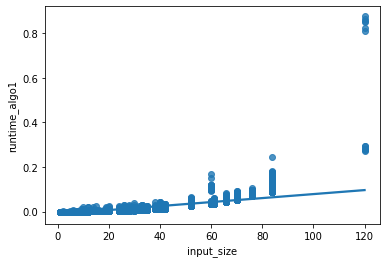

y = 0.00154x + -0.01798


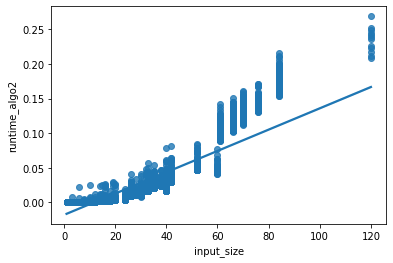

y = 0.00003x + -0.00012


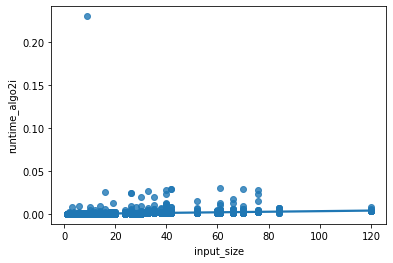

In [78]:
plotScatter(algo1_trees, ['input_size', 'runtime_algo1'])
plotScatter(algo2_trees, ['input_size', 'runtime_algo2'])
plotScatter(algo2i_trees, ['input_size', 'runtime_algo2i'])

y = 0.02191x + 1.62616


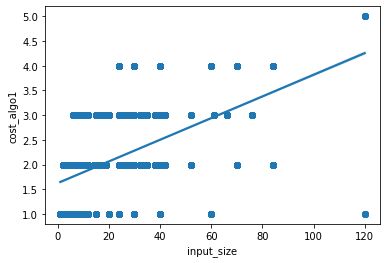

y = 2.83433x + -13.73939


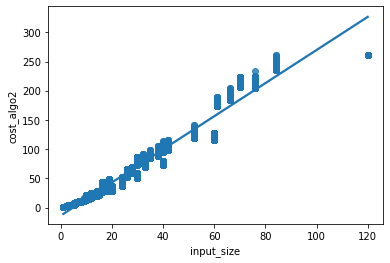

y = 0.28374x + 1.80162


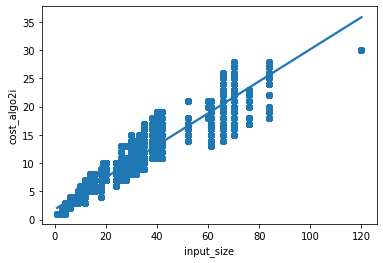

In [79]:
plotScatter(algo1_trees, ['input_size', 'cost_algo1'])
plotScatter(algo2_trees, ['input_size', 'cost_algo2'])
plotScatter(algo2i_trees, ['input_size', 'cost_algo2i'])

y = 0.15376x + 8.49239


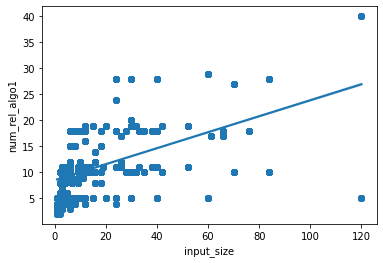

y = 36.69729x + -171.11230


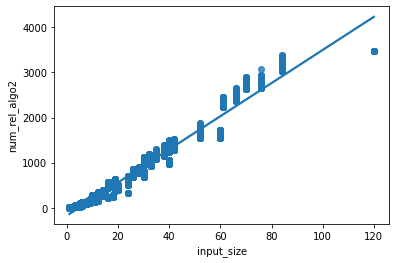

y = 3.81300x + 25.63943


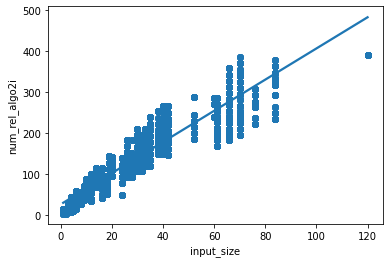

In [80]:
plotScatter(algo1_trees, ['input_size', 'num_rel_algo1'])
plotScatter(algo2_trees, ['input_size', 'num_rel_algo2'])
plotScatter(algo2i_trees, ['input_size', 'num_rel_algo2i'])

In [82]:
columns_fixed = ['input']
columns_algo1 = columns_fixed + ['output_algo1']
columns_algo2 = columns_fixed + ['output_algo2']
columns_algo2i = columns_fixed + ['output_algo2i']

optapprox_algo1_trees = getOptApprox(algo1_trees, 'algo1', columns_algo1, 'trees')
optapprox_algo2_trees = getOptApprox(algo2_trees, 'algo2', columns_algo2, 'trees')
optapprox_algo2i_trees = getOptApprox(algo2i_trees, 'algo2i', columns_algo2i, 'trees')

optapprox_algo1_v3_trees = getOptApprox(all3_trees, 'algo1', columns_algo1, 'trees')
optapprox_algo2_v3_trees = getOptApprox(all3_trees, 'algo2', columns_algo2, 'trees')
optapprox_algo2i_v3_trees = getOptApprox(all3_trees, 'algo2i', columns_algo2i, 'trees')

optapprox_algo1_v4_trees = getOptApprox(all4_trees, 'algo1', columns_algo1, 'trees')
optapprox_algo2_v4_trees = getOptApprox(all4_trees, 'algo2', columns_algo2, 'trees')
optapprox_algo2i_v4_trees = getOptApprox(all4_trees, 'algo2i', columns_algo2i, 'trees')

optapprox_algo1_v5_trees = getOptApprox(all5_trees, 'algo1', columns_algo1, 'trees')
optapprox_algo2_v5_trees = getOptApprox(all5_trees, 'algo2', columns_algo2, 'trees')
optapprox_algo2i_v5_trees = getOptApprox(all5_trees, 'algo2i', columns_algo2i, 'trees')

optapprox_algo1_v6_trees = getOptApprox(all6_trees, 'algo1', columns_algo1, 'trees')
optapprox_algo2_v6_trees = getOptApprox(all6_trees, 'algo2', columns_algo2, 'trees')
optapprox_algo2i_v6_trees = getOptApprox(all6_trees, 'algo2i', columns_algo2i, 'trees')

print(optapprox_algo1_trees.shape)
print(optapprox_algo2_trees.shape)
print(optapprox_algo2i_trees.shape)
print('---')
print(optapprox_algo1_v3_trees.shape)
print(optapprox_algo2_v3_trees.shape)
print(optapprox_algo2i_v3_trees.shape)
print('---')
print(optapprox_algo1_v4_trees.shape)
print(optapprox_algo2_v4_trees.shape)
print(optapprox_algo2i_v4_trees.shape)
print('---')
print(optapprox_algo1_v5_trees.shape)
print(optapprox_algo2_v5_trees.shape)
print(optapprox_algo2i_v5_trees.shape)
print('---')
print(optapprox_algo1_v6_trees.shape)
print(optapprox_algo2_v6_trees.shape)
print(optapprox_algo2i_v6_trees.shape)

(8474, 2)
(870, 2)
(1950, 2)
---
(9, 2)
(6, 2)
(12, 2)
---
(64, 2)
(24, 2)
(48, 2)
---
(625, 2)
(120, 2)
(270, 2)
---
(7776, 2)
(720, 2)
(1620, 2)


In [85]:
columns_fixed = ['input']
columns_algo1 = columns_fixed + ['cost_algo1']
columns_algo2 = columns_fixed + ['cost_algo2']
columns_algo2i = columns_fixed + ['cost_algo2i']

nonoptapprox_algo1_trees = getNonoptApprox(algo1_trees, 'algo1', columns_algo1, 'trees')
nonoptapprox_algo2_trees = getNonoptApprox(algo2_trees, 'algo2', columns_algo2, 'trees')
nonoptapprox_algo2i_trees = getNonoptApprox(algo2i_trees, 'algo2i', columns_algo2i, 'trees')

print(nonoptapprox_algo1_trees.describe())
print(nonoptapprox_algo2_trees.describe())
print(nonoptapprox_algo2i_trees.describe())

         cost_algo1
count  35138.000000
mean       2.368604
std        0.535711
min        2.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
         cost_algo2
count  42742.000000
mean      48.859389
std       49.979584
min        2.000000
25%       13.000000
50%       31.000000
75%       72.000000
max      261.000000
        cost_algo2i
count  41662.000000
mean       8.299146
std        5.078989
min        2.000000
25%        4.000000
50%        7.000000
75%       12.000000
max       30.000000


In [89]:
columns_fixed = ['input']
columns_algo1_algo2 = columns_fixed + ['output_algo1', 'output_algo2']
columns_algo2_algo2i = columns_fixed + ['output_algo2', 'output_algo2i']

sameapprox_algo1_algo2_trees = getSameApprox(all_trees, 'algo1', 'algo2', columns_algo1_algo2)
sameapprox_algo2_algo2i_trees = getSameApprox(all_trees, 'algo2', 'algo2i', columns_algo2_algo2i)

print(sameapprox_algo1_algo2_trees.shape)
print(sameapprox_algo2_algo2i_trees.shape)

(1305, 3)
(870, 3)


### TO-DO

<ul>
    <li>fix yung 2148-2149 discrepancy for 4voptsol
    <li>fix yung all3, all4, at algo1 di nagtutugma bilang ng opt approx
    <li>cost and num rel?
    <li>cost diff algo1 and algo2
    <li>cost diff algo2 and algo2i
</ul>